# Combining all 100m Cells with Population from Baden Württemberg

In [2]:
import pandas as pd 
import os
import geopandas as gpd
import matplotlib as plt

The function drops unnecessary colums. 
The ags colum includes the Gemeindeschlüssel and can be used to filter all what is included in Baden Württemberg as its Gemeindeschlüssel starts with 08

In [3]:
def umwandeln(name):
    file = gpd.read_file(name)
    file.drop(["f_staat", "f_land", "f_wasser", "p_staat", "p_land", "p_wasser"], axis = 1, inplace= True)
    file["ags"] = file["ags"].astype(str)
    file = file[file['ags'].str.startswith("08")]
    file["ags"] = file["ags"].astype(object)
    return file

In [4]:
os.chdir("/Users/sophi/Documents/GIS/DE_Grid_ETRS89-LAEA_100m_shp/geogitter")

Applying it to all Shapefiles

In [5]:
N27E41 = umwandeln("100kmN27E41_DE_Grid_ETRS89-LAEA_100m.shp")

In [6]:
N27E42 = umwandeln("100kmN27E42_DE_Grid_ETRS89-LAEA_100m.shp")

In [7]:
N27E43 = umwandeln("100kmN27E43_DE_Grid_ETRS89-LAEA_100m.shp")

In [8]:
N28E41 = umwandeln("100kmN28E41_DE_Grid_ETRS89-LAEA_100m.shp")

In [9]:
N28E42 = umwandeln("100kmN28E42_DE_Grid_ETRS89-LAEA_100m.shp")

In [10]:
N28E43 = umwandeln("100kmN28E43_DE_Grid_ETRS89-LAEA_100m.shp")

In [11]:
N28E40 = umwandeln("100kmN28E40_DE_Grid_ETRS89-LAEA_100m.shp")

In [12]:
N29E40 = umwandeln("100kmN29E40_DE_Grid_ETRS89-LAEA_100m.shp")

In [14]:
N29E41 = umwandeln("100kmN29E41_DE_Grid_ETRS89-LAEA_100m.shp")

In [15]:
N29E42 = umwandeln("100kmN29E42_DE_Grid_ETRS89-LAEA_100m.shp")

In [16]:
N29E43 = umwandeln("100kmN29E43_DE_Grid_ETRS89-LAEA_100m.shp")

In [17]:
N30E41 = umwandeln("100kmN30E41_DE_Grid_ETRS89-LAEA_100m.shp")

In [18]:
gitterList = [N27E41, N27E42, N27E43,N28E40,  N28E41, N28E42, N28E43, N29E40, N29E41, N29E42, N29E43]

Combining all Gitters

In [19]:
gitter = pd.concat(gitterList)

In [20]:
gitter.head()

,id,x_sw,y_sw,x_mp,y_mp,ags,geometry
0,100mN27159E41461,4146100.0,2715900.0,4146150.0,2715950.0,08336105,"POLYGON ((4146100.000 2715900.000, 4146100.000..."
1,100mN27159E41462,4146200.0,2715900.0,4146250.0,2715950.0,08336105,"POLYGON ((4146200.000 2715900.000, 4146200.000..."
2,100mN27159E41463,4146300.0,2715900.0,4146350.0,2715950.0,08336105,"POLYGON ((4146300.000 2715900.000, 4146300.000..."
3,100mN27159E41464,4146400.0,2715900.0,4146450.0,2715950.0,08336105,"POLYGON ((4146400.000 2715900.000, 4146400.000..."
4,100mN27159E41465,4146500.0,2715900.0,4146550.0,2715950.0,08336105,"POLYGON ((4146500.000 2715900.000, 4146500.000..."


## Merging the the population data

This data was prepared in Bev100m.ipynb

In [21]:
os.chdir("/Users/sophi/Documents/GIS")
bev = pd.read_csv("BevKidsT.csv")

In [22]:
df = gitter.merge(bev, left_on= "id", right_on = "Gitter_ID_100m", how = "left" )
df.drop("Gitter_ID_100m", axis=1, inplace=True)
df.head()

,id,x_sw,y_sw,x_mp,y_mp,ags,geometry,INSGESAMT,ALTER_10JG
0,100mN27159E41461,4146100.0,2715900.0,4146150.0,2715950.0,08336105,"POLYGON ((4146100.000 2715900.000, 4146100.000...",NaN,NaN
1,100mN27159E41462,4146200.0,2715900.0,4146250.0,2715950.0,08336105,"POLYGON ((4146200.000 2715900.000, 4146200.000...",NaN,NaN
2,100mN27159E41463,4146300.0,2715900.0,4146350.0,2715950.0,08336105,"POLYGON ((4146300.000 2715900.000, 4146300.000...",NaN,NaN
3,100mN27159E41464,4146400.0,2715900.0,4146450.0,2715950.0,08336105,"POLYGON ((4146400.000 2715900.000, 4146400.000...",NaN,NaN
4,100mN27159E41465,4146500.0,2715900.0,4146550.0,2715950.0,08336105,"POLYGON ((4146500.000 2715900.000, 4146500.000...",NaN,NaN


### descriptive Statistics and a Plot

In [28]:
df["INSGESAMT"].describe()

count    349829.000000
mean         30.000786
std          34.509589
min           3.000000
25%           7.000000
50%          20.000000
75%          40.000000
max        1010.000000
Name: INSGESAMT, dtype: float64

<AxesSubplot: >

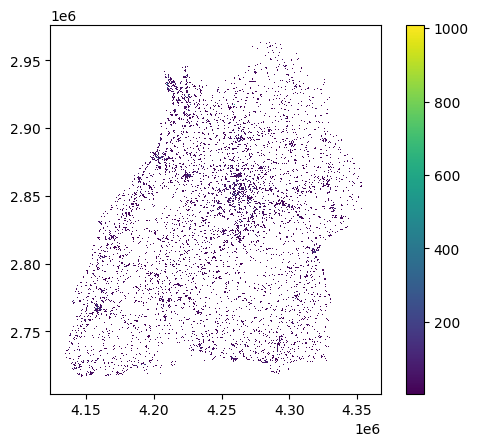

In [23]:
df.plot(column= "INSGESAMT",legend=True)

In [26]:
df.to_csv("bevBw.csv")